In [45]:
"""
This file is for analyzing the pattern of the heartbeat audio to aid in performing noise filtering and amplification
"""

'\nThis file is for analyzing the pattern of the heartbeat audio to aid in performing noise filtering and amplification\n'

In [97]:
# https://www.dummies.com/article/technology/programming-web-design/python/performing-a-fast-fourier-transform-fft-on-a-sound-file-142859/
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import ndimage

In [92]:
# https://www.dummies.com/article/technology/programming-web-design/python/performing-a-fast-fourier-transform-fft-on-a-sound-file-142859/
rate, data = scipy.io.wavfile.read('boosted_on_skin_freq_0.wav')   # https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#scipy.io.wavfile.read
data = [d[0] for d in data]
fft_out = scipy.fftpack.fft(data)          # https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html
fft_out[0], fft_out.shape

((-412879.99999999953-0j), (744731,))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


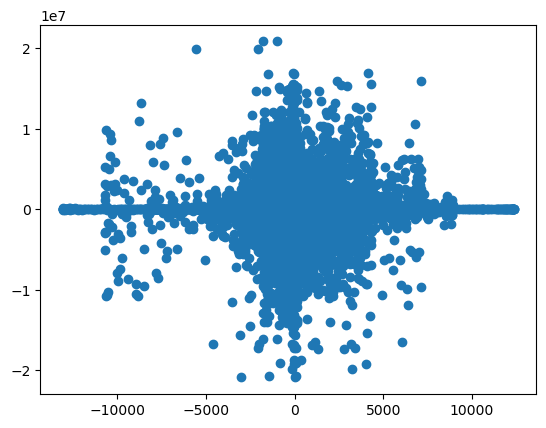

In [89]:
# https://www.dummies.com/article/technology/programming-web-design/python/performing-a-fast-fourier-transform-fft-on-a-sound-file-142859/
plt.scatter(data, np.abs(fft_out))
plt.show()

In [83]:
## This doesn't seem to provide much useful information.  Let's look at the data to see why that is

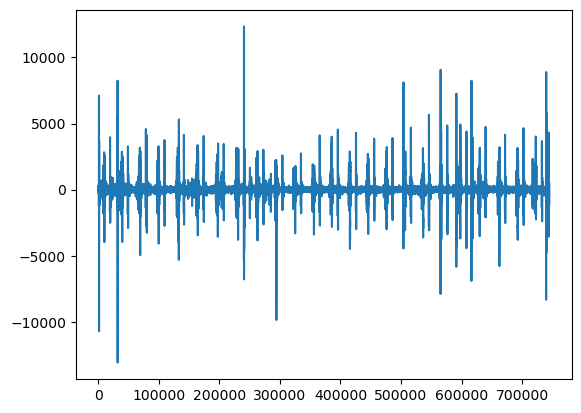

In [72]:
plt.plot(data)

In [73]:
data

[-120,
 -119,
 -119,
 -122,
 -121,
 -122,
 -116,
 -116,
 -107,
 -109,
 -110,
 -107,
 -102,
 -107,
 -98,
 -102,
 -97,
 -94,
 -84,
 -78,
 -81,
 -77,
 -69,
 -67,
 -69,
 -56,
 -61,
 -49,
 -46,
 -39,
 -39,
 -29,
 -28,
 -22,
 -13,
 -15,
 0,
 2,
 8,
 19,
 20,
 26,
 26,
 28,
 42,
 42,
 49,
 55,
 69,
 78,
 78,
 86,
 89,
 105,
 105,
 107,
 117,
 117,
 127,
 129,
 142,
 141,
 148,
 151,
 159,
 166,
 168,
 176,
 178,
 179,
 193,
 194,
 195,
 207,
 205,
 210,
 213,
 219,
 227,
 232,
 230,
 233,
 241,
 246,
 241,
 247,
 246,
 258,
 259,
 264,
 263,
 271,
 272,
 269,
 279,
 276,
 280,
 273,
 278,
 278,
 279,
 288,
 285,
 288,
 286,
 293,
 288,
 296,
 291,
 295,
 295,
 292,
 296,
 292,
 295,
 298,
 296,
 293,
 297,
 298,
 298,
 296,
 293,
 295,
 288,
 294,
 296,
 292,
 287,
 286,
 290,
 285,
 289,
 281,
 281,
 281,
 282,
 281,
 281,
 277,
 268,
 274,
 268,
 271,
 270,
 266,
 264,
 267,
 265,
 269,
 254,
 255,
 250,
 249,
 249,
 240,
 233,
 236,
 234,
 227,
 229,
 219,
 221,
 213,
 215,
 206,
 206,
 20

(array([3.40000e+01, 2.80000e+01, 4.20000e+01, 3.90000e+01, 8.40000e+01,
        9.60000e+01, 5.08000e+02, 3.83700e+03, 1.18050e+04, 5.47870e+04,
        6.41865e+05, 2.09430e+04, 7.97400e+03, 1.86500e+03, 3.59000e+02,
        2.11000e+02, 1.54000e+02, 4.80000e+01, 1.80000e+01, 3.40000e+01]),
 array([-13077.  , -11805.85, -10534.7 ,  -9263.55,  -7992.4 ,  -6721.25,
         -5450.1 ,  -4178.95,  -2907.8 ,  -1636.65,   -365.5 ,    905.65,
          2176.8 ,   3447.95,   4719.1 ,   5990.25,   7261.4 ,   8532.55,
          9803.7 ,  11074.85,  12346.  ]),
 <a list of 20 Patch objects>)

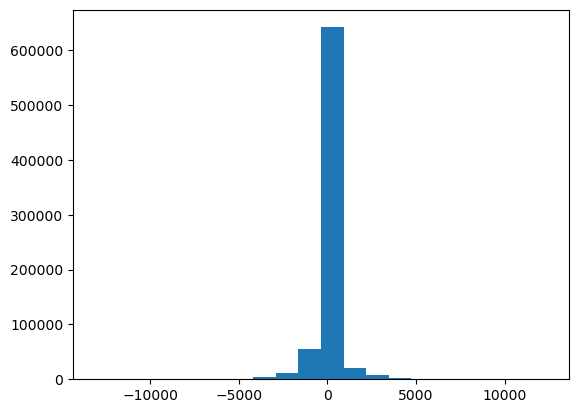

In [74]:
plt.hist(data, bins=20)

In [75]:
composition = {}
for p in data:
    if not (p in composition):
        composition[p] = 0
    composition[p]+=1
composition

{-120: 1023,
 -119: 1089,
 -122: 1019,
 -121: 1023,
 -116: 1048,
 -107: 1140,
 -109: 1191,
 -110: 1211,
 -102: 1297,
 -98: 1327,
 -97: 1253,
 -94: 1393,
 -84: 1465,
 -78: 1527,
 -81: 1506,
 -77: 1449,
 -69: 1579,
 -67: 1515,
 -56: 1657,
 -61: 1568,
 -49: 1754,
 -46: 1821,
 -39: 1864,
 -29: 1984,
 -28: 1926,
 -22: 2089,
 -13: 1937,
 -15: 1984,
 0: 2055,
 2: 2037,
 8: 1977,
 19: 1940,
 20: 2015,
 26: 1932,
 28: 1912,
 42: 1909,
 49: 1683,
 55: 1644,
 69: 1505,
 78: 1524,
 86: 1384,
 89: 1388,
 105: 1258,
 107: 1166,
 117: 1167,
 127: 1095,
 129: 1084,
 142: 899,
 141: 927,
 148: 895,
 151: 878,
 159: 854,
 166: 763,
 168: 762,
 176: 727,
 178: 687,
 179: 687,
 193: 577,
 194: 547,
 195: 525,
 207: 465,
 205: 534,
 210: 449,
 213: 486,
 219: 441,
 227: 436,
 232: 403,
 230: 413,
 233: 377,
 241: 311,
 246: 315,
 247: 358,
 258: 278,
 259: 266,
 264: 257,
 263: 246,
 271: 260,
 272: 232,
 269: 251,
 279: 263,
 276: 228,
 280: 237,
 273: 245,
 278: 231,
 288: 245,
 285: 233,
 286: 256,
 293

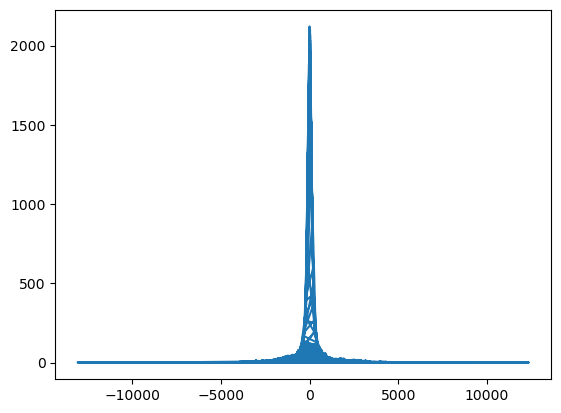

In [76]:
plt.plot([k for k in composition.keys()], [composition[k] for k in composition.keys()])

In [77]:
a=composition.keys()
[i for i in a]

[-120,
 -119,
 -122,
 -121,
 -116,
 -107,
 -109,
 -110,
 -102,
 -98,
 -97,
 -94,
 -84,
 -78,
 -81,
 -77,
 -69,
 -67,
 -56,
 -61,
 -49,
 -46,
 -39,
 -29,
 -28,
 -22,
 -13,
 -15,
 0,
 2,
 8,
 19,
 20,
 26,
 28,
 42,
 49,
 55,
 69,
 78,
 86,
 89,
 105,
 107,
 117,
 127,
 129,
 142,
 141,
 148,
 151,
 159,
 166,
 168,
 176,
 178,
 179,
 193,
 194,
 195,
 207,
 205,
 210,
 213,
 219,
 227,
 232,
 230,
 233,
 241,
 246,
 247,
 258,
 259,
 264,
 263,
 271,
 272,
 269,
 279,
 276,
 280,
 273,
 278,
 288,
 285,
 286,
 293,
 296,
 291,
 295,
 292,
 298,
 297,
 294,
 287,
 290,
 289,
 281,
 282,
 277,
 268,
 274,
 270,
 266,
 267,
 265,
 254,
 255,
 250,
 249,
 240,
 236,
 234,
 229,
 221,
 215,
 206,
 200,
 198,
 189,
 185,
 174,
 165,
 164,
 150,
 155,
 144,
 135,
 122,
 119,
 115,
 110,
 108,
 94,
 90,
 79,
 74,
 66,
 56,
 52,
 41,
 38,
 31,
 30,
 18,
 17,
 3,
 7,
 -9,
 -3,
 -8,
 -12,
 -21,
 -33,
 -60,
 -58,
 -72,
 -79,
 -87,
 -93,
 -96,
 -100,
 -99,
 -105,
 -112,
 -117,
 -128,
 -134,
 -137,
 

In [78]:
std = np.std(data)
print(np.mean(data), std)

-0.5544015221603505 713.241028020202


In [79]:
smoothened = np.convolve(data, np.ones((10)))

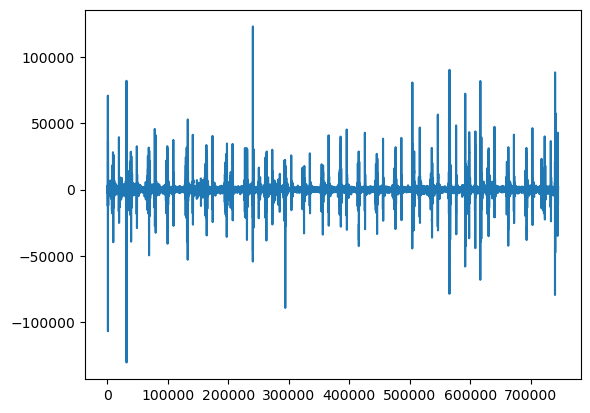

In [80]:
plt.plot(smoothened)

In [81]:
np.mean(smoothened), np.std(smoothened)

(-5.5439482235411015, 7117.793480699557)

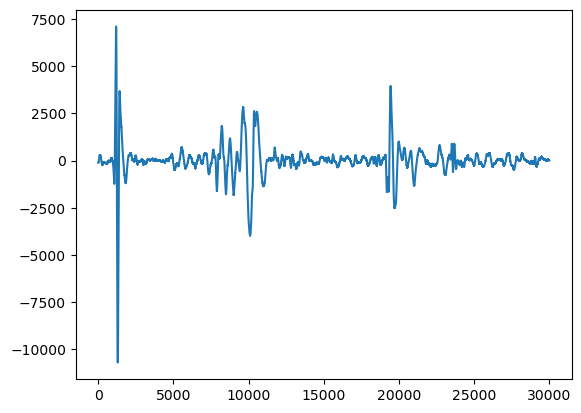

In [82]:
plt.plot(data[0:30000])

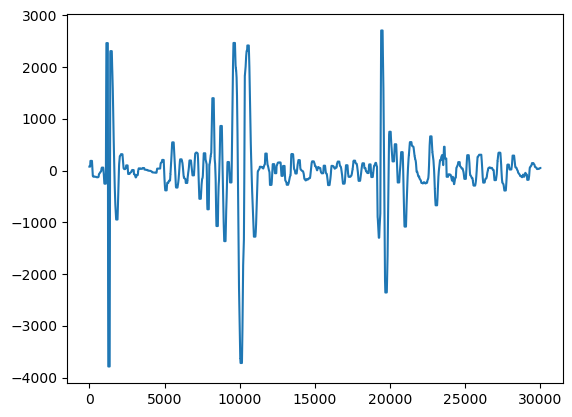

In [100]:
plt.plot(ndimage.median_filter(data[0:30000], size=200))